In [1]:
import os 
# os.chdir("MyPath/PyLab/Chapter09")
os.chdir("C:/Users/tprabhan/Documents/My_Books/RSADBE_2.0/R_and_Python_Programs/Python/Chapter_10/")
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d

C:\Users\tprabhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Bagging

In [4]:
GC = pd.read_csv("Data/GC2.csv",delimiter=',')
y = GC[['good_bad']]
from sklearn.utils import column_or_1d
y = column_or_1d(y, warn=True)
X = GC.iloc[:,0:20]
#n_classes = y.shape[1]

C:\Users\tprabhan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [6]:
cart = DecisionTreeClassifier(max_depth=6,min_samples_leaf=10)
num_trees = 500
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees).fit(X=X_train,y=y_train)

In [7]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
fpr_train, tpr_train, thresholds = roc_curve(y_train,y_train_pred)
fpr_test, tpr_test, thresholds = roc_curve(y_test,y_test_pred)
roc_auc_train = auc(fpr_train,tpr_train)
roc_auc_test = auc(fpr_test,tpr_test)
print("Area under the ROC Curve for Train Data is : %f" % roc_auc_train)
print("Area under the ROC Curve for Test Data is : %f" % roc_auc_test)

Area under the ROC Curve for Train Data is : 0.755628
Area under the ROC Curve for Test Data is : 0.645095


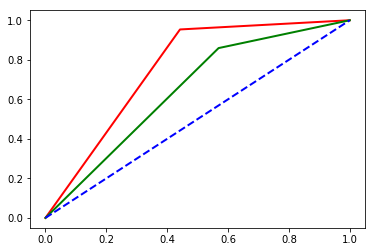

In [9]:
plt.plot(fpr_train,tpr_train,color='red',lw=2,label='ROC Curve')
plt.plot(fpr_test,tpr_test,color='green',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.show()

In [10]:
# Random Forest

In [11]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=10)
model_RF = model.fit(X_train,y_train)

In [12]:
y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)
fpr_train_RF, tpr_train_RF, thresholds_RF = roc_curve(y_train,y_train_pred)
fpr_test_RF, tpr_test_RF, thresholds = roc_curve(y_test,y_test_pred)
roc_auc_train_RF = auc(fpr_train_RF,tpr_train_RF)
roc_auc_test_RF = auc(fpr_test_RF,tpr_test_RF)
print("Area under the ROC Curve for Train Data is : %f" % roc_auc_train_RF)
print("Area under the ROC Curve for Test Data is : %f" % roc_auc_test_RF)

Area under the ROC Curve for Train Data is : 0.739047
Area under the ROC Curve for Test Data is : 0.621540


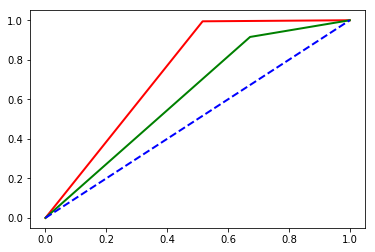

In [13]:
plt.plot(fpr_train_RF,tpr_train_RF,color='red',lw=2,label='ROC Curve')
plt.plot(fpr_test_RF,tpr_test_RF,color='green',lw=2)
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.show()